In [ ]:
import os
import pymc3 as pm
import arviz as az
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

# Training with latent vector

In [ ]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]),
                      )
    
    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')
        
        

In [ ]:
def plot_traces_(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]),
                      )
    
    # for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
    #     ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
    #                 ,xytext=(5,10), textcoords='offset points', rotation=90
    #                 ,va='bottom', fontsize='large', color='#AA0022')
        
        

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if __name__ == '__main__':
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a fu

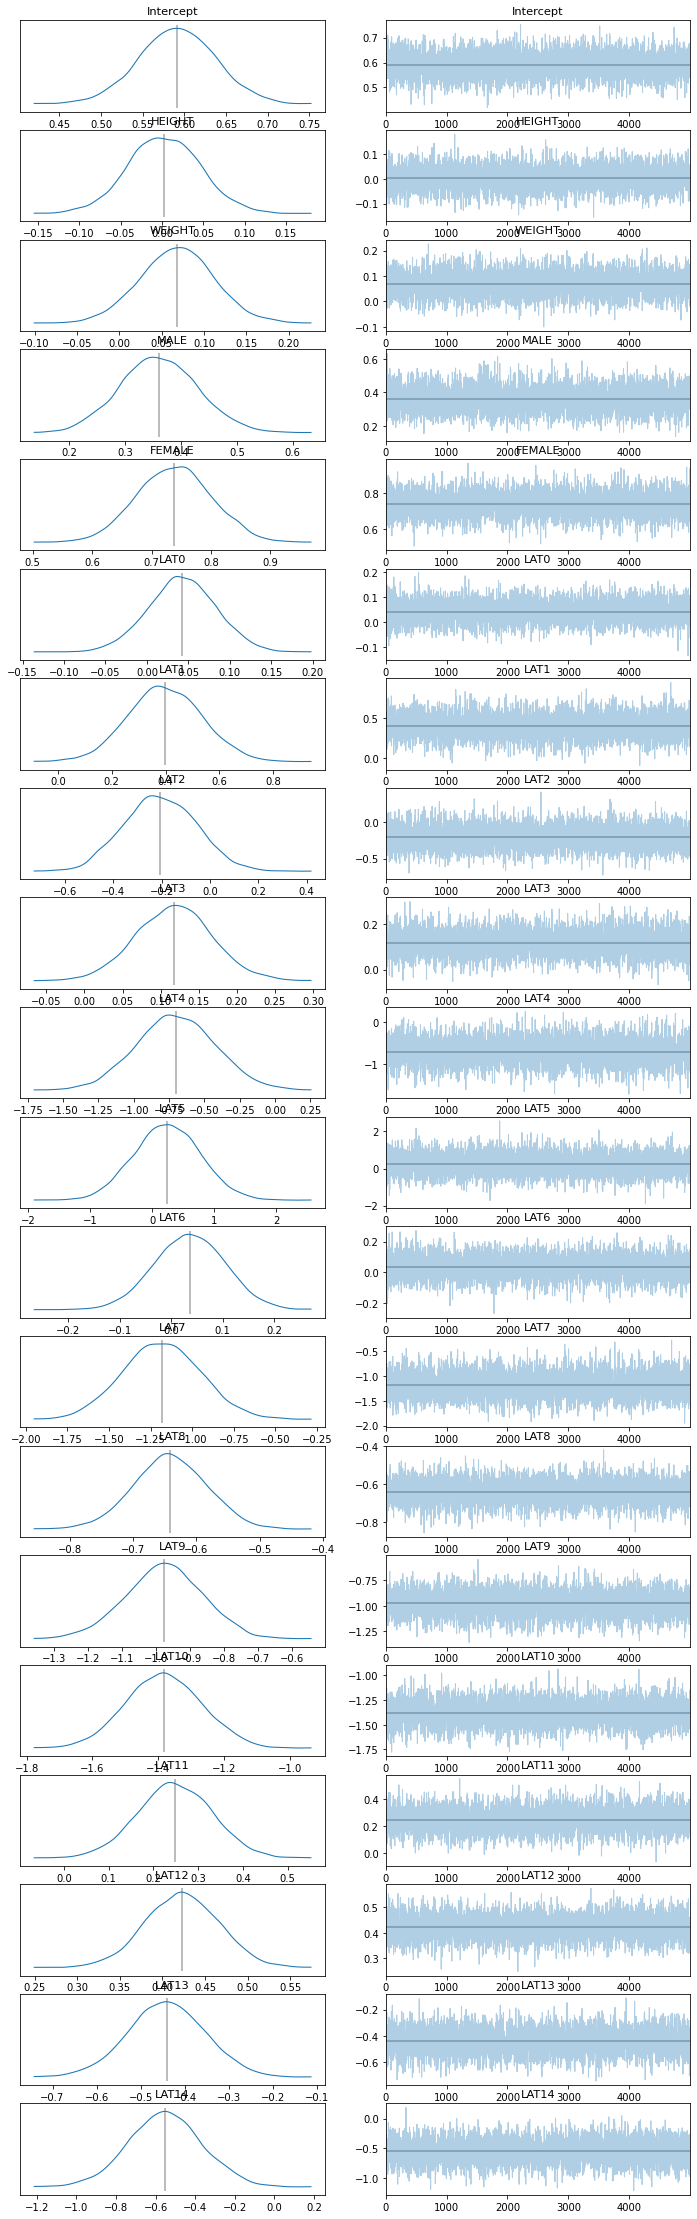

In [ ]:
plot_traces_(trace_VI)

In [ ]:
# Demographic/latent vector file path
from google.colab import drive
drive.mount('/content/MyDrive')
root = './MyDrive/MyDrive/class-BayesML'
filename = 'Bayesian Learning Final Project/Submission/NN_model/tn_combined_sex.npy'

Mounted at /content/MyDrive


In [ ]:
# Load demographic/latent vector
np_data = np.load(os.path.join(root, filename), allow_pickle=True)

In [ ]:
# Convert to dataframe
columns = ['IXI_ID', 'HEIGHT', 'WEIGHT', 'MALE', 'FEMALE', 'AGE']

num_lat_var = 15
for i in range(num_lat_var):
    columns.append('LAT' + str(i))

df_data_entire = pd.DataFrame(np_data, columns = columns)
print(df_data_entire)

     IXI_ID  HEIGHT  WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0     474.0   152.0    60.0   0.0  ...  0.066442  1.080727  0.741352  0.299949
1     282.0   183.0    72.0   1.0  ...  0.129216  1.282407  0.054497  0.014995
2     353.0   172.0    90.0   0.0  ...  0.799047  1.159365  0.498485  0.058067
3     611.0   175.0    76.0   1.0  ...  0.271713  0.432335  0.041010  0.031333
4     319.0   180.0    67.0   1.0  ...  0.308263  1.124598  0.111896  0.038347
..      ...     ...     ...   ...  ...       ...       ...       ...       ...
490   549.0   162.0    54.0   0.0  ...  0.179386  0.997614  0.024496  0.032963
491   499.0   168.0    62.0   1.0  ...  0.223187  0.512411  0.002536  0.024003
492   189.0   164.0    63.0   0.0  ...  1.225677  1.648048  0.577537  0.145062
493   107.0   173.0    57.0   0.0  ...  0.865387  0.682889  0.374095  0.028572
494   118.0   165.0    50.0   0.0  ...  0.298193  1.324737  0.011370  0.630738

[495 rows x 21 columns]


In [ ]:
# Remove invalid IDs that contain NaN or 0
# df_data_entire = df_data_entire.loc[(df_data_entire!=0).all(axis=1)] # Remove the rows that contain 0
df_data_entire = df_data_entire.dropna(axis=0, how='any') # Remove the rows that contain Nan
print(df_data_entire)
print("==================================================================")
print(df_data_entire.describe())

     IXI_ID  HEIGHT  WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0     474.0   152.0    60.0   0.0  ...  0.066442  1.080727  0.741352  0.299949
1     282.0   183.0    72.0   1.0  ...  0.129216  1.282407  0.054497  0.014995
2     353.0   172.0    90.0   0.0  ...  0.799047  1.159365  0.498485  0.058067
3     611.0   175.0    76.0   1.0  ...  0.271713  0.432335  0.041010  0.031333
4     319.0   180.0    67.0   1.0  ...  0.308263  1.124598  0.111896  0.038347
..      ...     ...     ...   ...  ...       ...       ...       ...       ...
490   549.0   162.0    54.0   0.0  ...  0.179386  0.997614  0.024496  0.032963
491   499.0   168.0    62.0   1.0  ...  0.223187  0.512411  0.002536  0.024003
492   189.0   164.0    63.0   0.0  ...  1.225677  1.648048  0.577537  0.145062
493   107.0   173.0    57.0   0.0  ...  0.865387  0.682889  0.374095  0.028572
494   118.0   165.0    50.0   0.0  ...  0.298193  1.324737  0.011370  0.630738

[493 rows x 21 columns]
           IXI_ID       HEI

In [ ]:
print(df_data_entire.keys())

Index(['IXI_ID', 'HEIGHT', 'WEIGHT', 'MALE', 'FEMALE', 'AGE', 'LAT0', 'LAT1',
       'LAT2', 'LAT3', 'LAT4', 'LAT5', 'LAT6', 'LAT7', 'LAT8', 'LAT9', 'LAT10',
       'LAT11', 'LAT12', 'LAT13', 'LAT14'],
      dtype='object')


In [ ]:
# Take the comlumns we will use
print("==================================================================")
# df_data = df_data_entire[['IXI_ID', 'AGE', 'LAT1', 'LAT2', 'LAT3', 'LAT4', 'LAT5',
#            'LAT6', 'LAT7', 'LAT8', 'LAT9', 'LAT10',
#            'LAT11', 'LAT12', 'LAT13', 'LAT14', 'LAT15']]
df_data = df_data_entire         
print(df_data)

     IXI_ID  HEIGHT  WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0     474.0   152.0    60.0   0.0  ...  0.066442  1.080727  0.741352  0.299949
1     282.0   183.0    72.0   1.0  ...  0.129216  1.282407  0.054497  0.014995
2     353.0   172.0    90.0   0.0  ...  0.799047  1.159365  0.498485  0.058067
3     611.0   175.0    76.0   1.0  ...  0.271713  0.432335  0.041010  0.031333
4     319.0   180.0    67.0   1.0  ...  0.308263  1.124598  0.111896  0.038347
..      ...     ...     ...   ...  ...       ...       ...       ...       ...
490   549.0   162.0    54.0   0.0  ...  0.179386  0.997614  0.024496  0.032963
491   499.0   168.0    62.0   1.0  ...  0.223187  0.512411  0.002536  0.024003
492   189.0   164.0    63.0   0.0  ...  1.225677  1.648048  0.577537  0.145062
493   107.0   173.0    57.0   0.0  ...  0.865387  0.682889  0.374095  0.028572
494   118.0   165.0    50.0   0.0  ...  0.298193  1.324737  0.011370  0.630738

[493 rows x 21 columns]


In [ ]:
# See the data distribution
# g = sns.pairplot(df_data)

In [ ]:
# Standardize the data (mean for each numerical variable of zero, standard deviation of one.)
df_data_normalized = df_data.copy()

for key in df_data.keys()[1:]:
    try:
        if key == 'HEIGHT' or key == 'WEIGHT' or key == 'AGE':
            print("Standardizing "+key+".")
            df_data_normalized[key] = df_data_normalized[key] - np.mean(df_data_normalized[key])
            df_data_normalized[key] = df_data_normalized[key] / np.std(df_data_normalized[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
print("==================================================================")
print(df_data_normalized)
print("==================================================================")
print(df_data_normalized.describe())


Standardizing HEIGHT.
Standardizing WEIGHT.
Standardizing AGE.
     IXI_ID    HEIGHT    WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0     474.0 -0.156494 -0.223046   0.0  ...  0.066442  1.080727  0.741352  0.299949
1     282.0  0.141389 -0.025599   1.0  ...  0.129216  1.282407  0.054497  0.014995
2     353.0  0.035688  0.270573   0.0  ...  0.799047  1.159365  0.498485  0.058067
3     611.0  0.064516  0.040217   1.0  ...  0.271713  0.432335  0.041010  0.031333
4     319.0  0.112561 -0.107869   1.0  ...  0.308263  1.124598  0.111896  0.038347
..      ...       ...       ...   ...  ...       ...       ...       ...       ...
490   549.0 -0.060403 -0.321770   0.0  ...  0.179386  0.997614  0.024496  0.032963
491   499.0 -0.002748 -0.190138   1.0  ...  0.223187  0.512411  0.002536  0.024003
492   189.0 -0.041185 -0.173684   0.0  ...  1.225677  1.648048  0.577537  0.145062
493   107.0  0.045297 -0.272408   0.0  ...  0.865387  0.682889  0.374095  0.028572
494   118.0 -0.031576 -0

In [ ]:
formula_str = 'AGE ~ HEIGHT + WEIGHT + MALE + FEMALE' 
for i in range(num_lat_var):
    formula_str += ' + LAT' + str(i)

In [ ]:
formula_str

'AGE ~ HEIGHT + WEIGHT + MALE + FEMALE + LAT0 + LAT1 + LAT2 + LAT3 + LAT4 + LAT5 + LAT6 + LAT7 + LAT8 + LAT9 + LAT10 + LAT11 + LAT12 + LAT13 + LAT14'

In [ ]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = formula_str, 
                            data = df_data_normalized, 
                            family = pm.glm.families.Normal()) # Normal() for linear regression

    #trace = pm.sample(5000) 
    approx = pm.fit(50000, method = 'advi')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 819.05


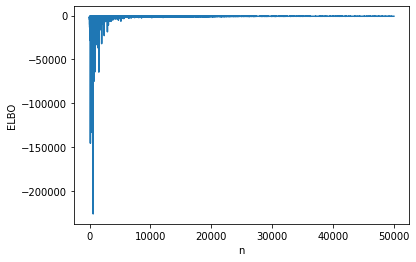

In [ ]:
advi_elbo = pd.DataFrame(
    {'ELBO': -approx.hist,
     'n': np.arange(approx.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

In [ ]:
trace_VI = approx.sample(draws=5000)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if __name__ == '__main__':
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a fu

IndexError: ignored

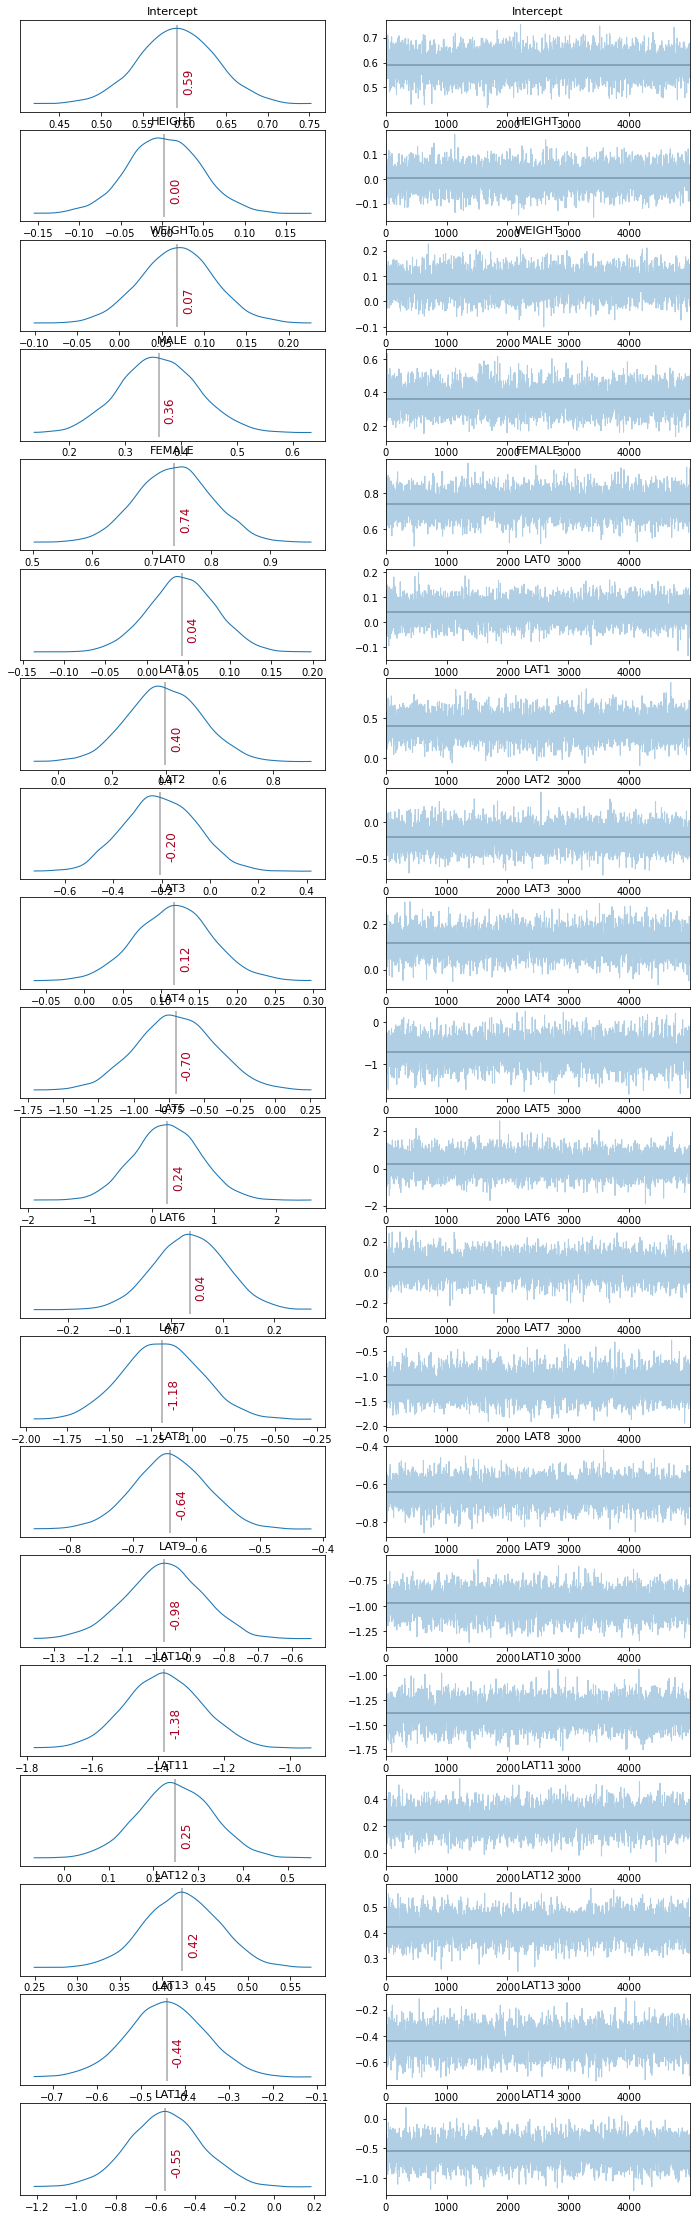

In [ ]:
plot_traces(trace_VI)

In [ ]:
pm.plots.forestplot(trace_VI, figsize=(12, 5))
# The creates a matplotlib plot, so we can modify with standard matplotlib commands
plt.grid()  # add a grid to the plot

In [ ]:
summary = pm.summary(trace_VI).round(2)
summary

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.00,0.05,-0.08,0.09,0.0,0.0,4878.0,4939.0,NaN
LAT1,0.00,0.05,-0.09,0.09,0.0,0.0,4781.0,4585.0,NaN
LAT2,0.08,0.05,-0.01,0.16,0.0,0.0,4946.0,4889.0,NaN
LAT3,-0.10,0.05,-0.18,-0.01,0.0,0.0,5190.0,4579.0,NaN
LAT4,0.08,0.05,-0.00,0.17,0.0,0.0,5279.0,4909.0,NaN
LAT5,-0.03,0.05,-0.12,0.05,0.0,0.0,4949.0,4726.0,NaN
LAT6,-0.02,0.05,-0.10,0.07,0.0,0.0,5038.0,4979.0,NaN
LAT7,-0.01,0.05,-0.10,0.08,0.0,0.0,4621.0,4706.0,NaN
LAT8,-0.11,0.05,-0.20,-0.02,0.0,0.0,5125.0,4899.0,NaN
LAT9,-0.25,0.05,-0.33,-0.16,0.0,0.0,5127.0,4907.0,NaN


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c7fba950>,
      dtype=object)

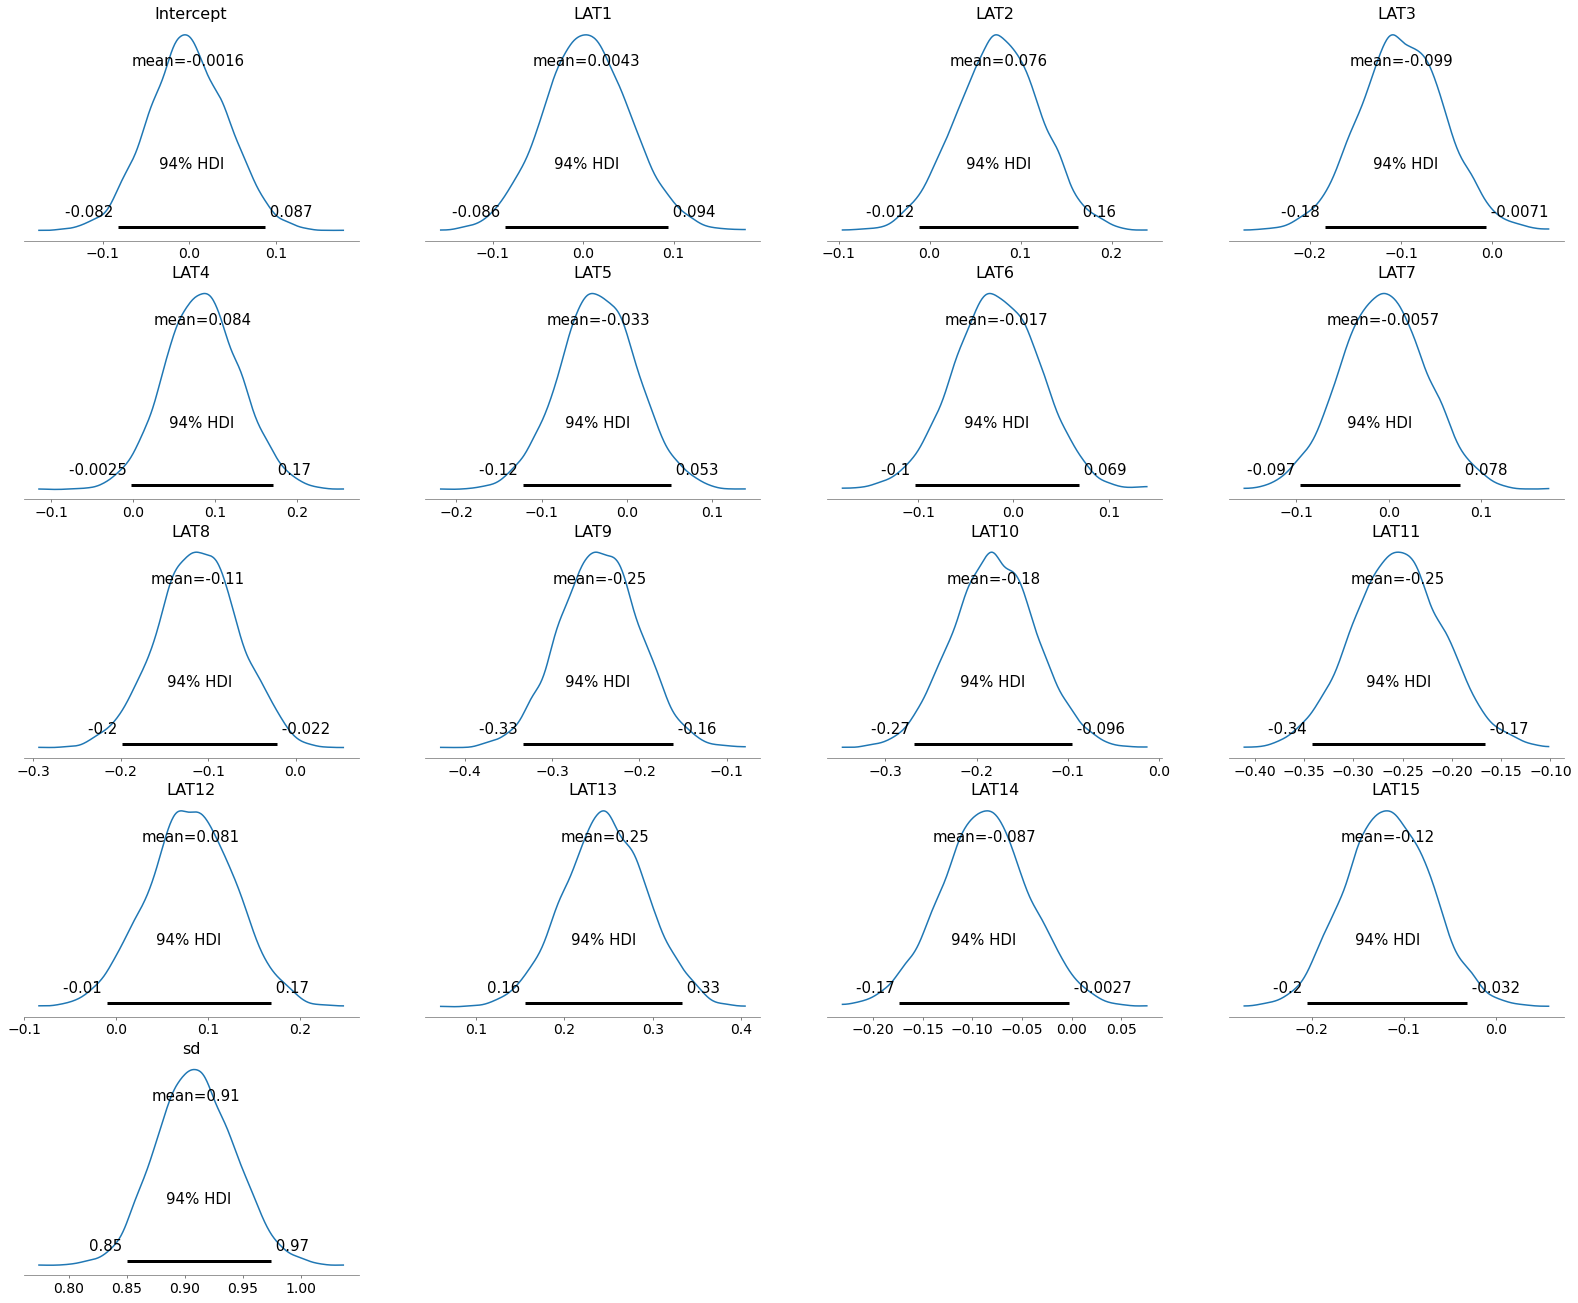

In [ ]:
pm.plots.plot_posterior(trace_VI)

# Prediction / Validation with the model trained by latent vector

In [ ]:
# Load validation set
val_filename = 'Bayesian Learning Final Project/Submission/NN_model/val_combined_sex.npy'
np_val_data = np.load(os.path.join(root, val_filename), allow_pickle=True)
df_val_data_entire = pd.DataFrame(np_val_data, columns = columns)
print(df_val_data_entire)


    IXI_ID  HEIGHT  WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0    140.0     0.0     0.0   0.0  ...  0.279237  1.238895  0.003308  0.237666
1    409.0     0.0    64.0   0.0  ...  0.352814  1.756701  0.025730  0.003121
2     30.0   180.0    65.0   1.0  ...  0.514011  1.311280  0.067248  0.107469
3    254.0   164.0    64.0   0.0  ...  0.442605  1.352628  0.393570  0.003649
4    544.0   170.0    60.0   0.0  ...  1.245456  1.357436  0.403240  0.017097
5     85.0   166.0    59.0   0.0  ...  0.555401  1.839041  0.301579  0.008698
6    521.0   163.0    73.0   0.0  ...  0.210772  1.586152  0.124127  0.030662
7    518.0   163.0    63.0   0.0  ...  0.434642  1.963578  0.022493  0.048807
8    315.0   173.0    70.0   0.0  ...  0.056308  2.002512  1.070540  0.335683
9     25.0   165.0    60.0   0.0  ...  0.416114  1.257622  0.080621  0.007710
10   262.0   156.0    47.0   0.0  ...  1.191785  0.953114  0.600195  0.170907
11   200.0   165.0    83.0   0.0  ...  0.825329  0.985412  0.444

In [ ]:
# Remove invalid IDs that contain NaN or 0
# df_val_data_entire = df_val_data_entire.loc[(df_val_data_entire!=0).all(axis=1)] # Remove the rows that contain 0
df_val_data_entire = df_val_data_entire.dropna(axis=0, how='any') # Remove the rows that contain Nan
print(df_val_data_entire)
print("==================================================================")
print(df_val_data_entire.describe())

    IXI_ID  HEIGHT  WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0    140.0     0.0     0.0   0.0  ...  0.279237  1.238895  0.003308  0.237666
1    409.0     0.0    64.0   0.0  ...  0.352814  1.756701  0.025730  0.003121
2     30.0   180.0    65.0   1.0  ...  0.514011  1.311280  0.067248  0.107469
3    254.0   164.0    64.0   0.0  ...  0.442605  1.352628  0.393570  0.003649
4    544.0   170.0    60.0   0.0  ...  1.245456  1.357436  0.403240  0.017097
5     85.0   166.0    59.0   0.0  ...  0.555401  1.839041  0.301579  0.008698
6    521.0   163.0    73.0   0.0  ...  0.210772  1.586152  0.124127  0.030662
7    518.0   163.0    63.0   0.0  ...  0.434642  1.963578  0.022493  0.048807
8    315.0   173.0    70.0   0.0  ...  0.056308  2.002512  1.070540  0.335683
9     25.0   165.0    60.0   0.0  ...  0.416114  1.257622  0.080621  0.007710
10   262.0   156.0    47.0   0.0  ...  1.191785  0.953114  0.600195  0.170907
11   200.0   165.0    83.0   0.0  ...  0.825329  0.985412  0.444

In [ ]:
# Take the comlumns we will use
print("==================================================================")
df_val_data = df_val_data_entire
print(df_val_data)

    IXI_ID  HEIGHT  WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0    140.0     0.0     0.0   0.0  ...  0.279237  1.238895  0.003308  0.237666
1    409.0     0.0    64.0   0.0  ...  0.352814  1.756701  0.025730  0.003121
2     30.0   180.0    65.0   1.0  ...  0.514011  1.311280  0.067248  0.107469
3    254.0   164.0    64.0   0.0  ...  0.442605  1.352628  0.393570  0.003649
4    544.0   170.0    60.0   0.0  ...  1.245456  1.357436  0.403240  0.017097
5     85.0   166.0    59.0   0.0  ...  0.555401  1.839041  0.301579  0.008698
6    521.0   163.0    73.0   0.0  ...  0.210772  1.586152  0.124127  0.030662
7    518.0   163.0    63.0   0.0  ...  0.434642  1.963578  0.022493  0.048807
8    315.0   173.0    70.0   0.0  ...  0.056308  2.002512  1.070540  0.335683
9     25.0   165.0    60.0   0.0  ...  0.416114  1.257622  0.080621  0.007710
10   262.0   156.0    47.0   0.0  ...  1.191785  0.953114  0.600195  0.170907
11   200.0   165.0    83.0   0.0  ...  0.825329  0.985412  0.444

In [ ]:
g = sns.pairplot(df_val_data)

In [ ]:
# Standardize the data (mean for each numerical variable of zero, standard deviation of one.)
df_val_data_normalized = df_val_data.copy()

for key in df_val_data.keys()[1:]:
    try:
        if key == 'HEIGHT' or key == 'WEIGHT' or key == 'AGE':
            print("Standardizing "+key+".")
            df_val_data_normalized[key] = df_val_data_normalized[key] - np.mean(df_val_data_normalized[key])
            df_val_data_normalized[key] = df_val_data_normalized[key] / np.std(df_val_data_normalized[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
print("==================================================================")
print(df_val_data_normalized)
print("==================================================================")
print(df_val_data_normalized.describe())

Standardizing HEIGHT.
Standardizing WEIGHT.
Standardizing AGE.
    IXI_ID    HEIGHT    WEIGHT  MALE  ...     LAT11     LAT12     LAT13     LAT14
0    140.0 -4.103847 -3.539137   0.0  ...  0.279237  1.238895  0.003308  0.237666
1    409.0 -4.103847 -0.327930   0.0  ...  0.352814  1.756701  0.025730  0.003121
2     30.0  0.538889 -0.277755   1.0  ...  0.514011  1.311280  0.067248  0.107469
3    254.0  0.126201 -0.327930   0.0  ...  0.442605  1.352628  0.393570  0.003649
4    544.0  0.280959 -0.528631   0.0  ...  1.245456  1.357436  0.403240  0.017097
5     85.0  0.177787 -0.578806   0.0  ...  0.555401  1.839041  0.301579  0.008698
6    521.0  0.100408  0.123646   0.0  ...  0.210772  1.586152  0.124127  0.030662
7    518.0  0.100408 -0.378105   0.0  ...  0.434642  1.963578  0.022493  0.048807
8    315.0  0.358338 -0.026880   0.0  ...  0.056308  2.002512  1.070540  0.335683
9     25.0  0.151994 -0.528631   0.0  ...  0.416114  1.257622  0.080621  0.007710
10   262.0 -0.080142 -1.180907   0.

# Prediction

In [ ]:
with pm.Model() as predictive_model:
    pm.glm.GLM.from_formula(formula = formula_str, 
                            data = df_val_data_normalized, 
                            # data = df_data_normalized, 
                            family = pm.glm.families.Normal()) # Normal() for linear regression

    #trace = pm.sample(5000) 
    # approx = pm.fit(50000, method = 'advi')
    posterior = pm.sample_posterior_predictive(trace_VI)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


In [ ]:
age_pred = posterior['y']

In [ ]:
# Denormalize
age_pred = age_pred * np.std(df_data['AGE'])
age_pred = age_pred + np.mean(df_data['AGE'])


In [ ]:
age_pred_mean = age_pred.mean(axis=0)
age_pred_sd = age_pred.std(axis=0)

age_pred_mean = np.expand_dims(age_pred_mean, axis=1)
age_pred_sd = np.expand_dims(age_pred_sd, axis=1)

age_pred_npmat = np.concatenate((age_pred_mean, age_pred_sd), axis=1)

In [ ]:
# Convert the prediction result into the dataframe
columns = ['AGE_PRED_MEAN', 'AGE_PRED_STD']
df_age_pred = pd.DataFrame(data=age_pred_npmat, columns=columns)

In [ ]:
df_val_data = df_val_data.reset_index(drop=True)
# df_data = df_data.reset_index(drop=True)
df_age_pred = df_age_pred.reset_index(drop=True)

In [ ]:
df_result = pd.concat([df_val_data['AGE'], df_age_pred], axis=1)
# df_result = pd.concat([df_data['AGE'], df_age_pred], axis=1)
df_result = df_result.sort_values(by=['AGE'])
df_result

,AGE,AGE_PRED_MEAN,AGE_PRED_STD
10,20.928131,45.934358,15.191629
48,22.570842,44.528961,15.133105
21,24.142368,39.257197,15.251566
8,25.451061,47.029280,15.102261
3,25.582478,45.225697,14.742332
54,25.585216,44.875957,15.061143
45,25.741273,44.238855,15.153036
12,26.272416,49.030224,14.883555
14,27.082820,46.143030,15.055428
0,27.835729,46.984159,15.126118


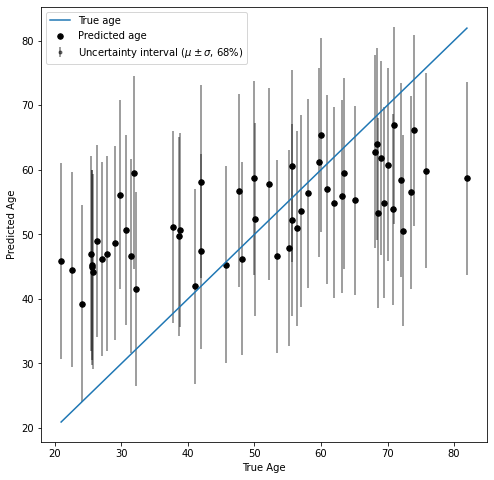

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df_result['AGE'], df_result['AGE'], label='True age')
plt.scatter(df_result['AGE'], df_result['AGE_PRED_MEAN'], c='k', s=30, label='Predicted age')
plt.errorbar(df_result['AGE'], df_result['AGE_PRED_MEAN'], df_result['AGE_PRED_STD'], fmt='.k', alpha=.5, label='Uncertainty interval ($\mu\pm\sigma$, 68%)')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.legend(loc='upper left')

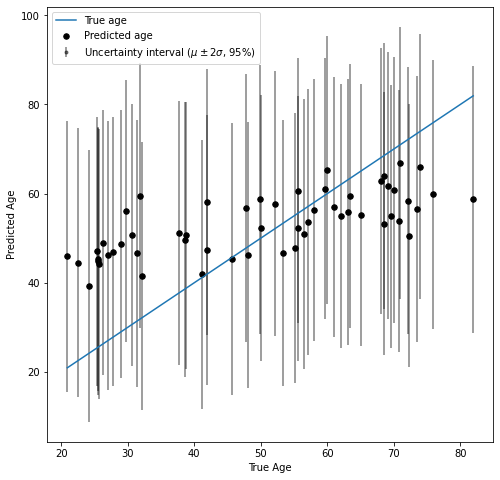

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df_result['AGE'], df_result['AGE'], label='True age')
plt.scatter(df_result['AGE'], df_result['AGE_PRED_MEAN'], c='k', s=30, label='Predicted age')
plt.errorbar(df_result['AGE'], df_result['AGE_PRED_MEAN'], 2*df_result['AGE_PRED_STD'], fmt='.k', alpha=.5, label='Uncertainty interval ($\mu\pm2\sigma$, 95%)')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.legend(loc='upper left')

# Training with latent vector and demographic (weight and height)

In [ ]:
df_data_entire.keys()

Index(['IXI_ID', 'HEIGHT', 'WEIGHT', 'AGE', 'LAT1', 'LAT2', 'LAT3', 'LAT4',
       'LAT5', 'LAT6', 'LAT7', 'LAT8', 'LAT9', 'LAT10', 'LAT11', 'LAT12',
       'LAT13', 'LAT14', 'LAT15'],
      dtype='object')

In [ ]:
print("==================================================================")
df_data = df_data_entire[['IXI_ID', 'AGE', 'SEX_ID' ,'HEIGHT', 'WEIGHT', 'LAT1', 'LAT2', 'LAT3', 'LAT4', 'LAT5',
           'LAT6', 'LAT7', 'LAT8', 'LAT9', 'LAT10',
           'LAT11', 'LAT12', 'LAT13', 'LAT14', 'LAT15']]
print(df_data)

KeyError: ignored

In [ ]:
# Remove the wrong cases 
df_data = df_data.loc[ (df_data['HEIGHT'] < 300) ] # Remove the rows that HEIGHT > 300cm
df_data = df_data.loc[ (df_data['HEIGHT'] > 130) ] # Remove the rows that HEIGHT < 130cm
df_data = df_data.loc[ (df_data['WEIGHT'] < 200) ] # Remove the rows that WEIGHT > 200kg

In [ ]:
# See the data distribution
#   SEX_ID:
#       1: male
#       2: female

g = sns.pairplot(df_data)


In [ ]:
df_data_normalized.keys()

Index(['IXI_ID', 'AGE', 'HEIGHT', 'WEIGHT', 'LAT1', 'LAT2', 'LAT3', 'LAT4',
       'LAT5', 'LAT6', 'LAT7', 'LAT8', 'LAT9', 'LAT10', 'LAT11', 'LAT12',
       'LAT13', 'LAT14', 'LAT15'],
      dtype='object')

In [ ]:
# Standardize the data (mean for each numerical variable of zero, standard deviation of one.)
df_data_normalized = df_data.copy()

for key in df_data.keys()[1:]:
    try:
        if key == 'HEIGHT' or key == 'WEIGHT':
            print("Standardizing "+key+".")
            df_data_normalized[key] = df_data_normalized[key] - np.mean(df_data_normalized[key])
            df_data_normalized[key] = df_data_normalized[key] / np.std(df_data_normalized[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
print("==================================================================")
print(df_data_normalized)
print("==================================================================")
print(df_data_normalized.describe())

Standardizing HEIGHT.
Standardizing WEIGHT.
     IXI_ID        AGE    HEIGHT  ...     LAT13     LAT14     LAT15
0     474.0  34.012320 -1.788394  ...  1.080727  0.741352  0.299949
1     282.0  40.008214  1.284864  ...  1.282407  0.054497  0.014995
2     353.0  52.689938  0.194353  ...  1.159365  0.498485  0.058067
3     611.0  28.870637  0.491765  ...  0.432335  0.041010  0.031333
4     319.0  59.471595  0.987452  ...  1.124598  0.111896  0.038347
..      ...        ...       ...  ...       ...       ...       ...
450   549.0  25.018480 -0.797021  ...  0.997614  0.024496  0.032963
451   499.0  82.187543 -0.202197  ...  0.512411  0.002536  0.024003
452   189.0  41.719370 -0.598746  ...  1.648048  0.577537  0.145062
453   107.0  31.895962  0.293490  ...  0.682889  0.374095  0.028572
454   118.0  25.927447 -0.499609  ...  1.324737  0.011370  0.630738

[455 rows x 19 columns]
           IXI_ID         AGE        HEIGHT  ...       LAT13       LAT14       LAT15
count  455.000000  455.000000 

In [ ]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = 'AGE ~ WEIGHT + HEIGHT + LAT1 + LAT2 + LAT3 + LAT4 + LAT5 + LAT6 + LAT7 + LAT8 + LAT9 + LAT10 + LAT11 + LAT12 + LAT13 + LAT14 + LAT15', 
                            data = df_data_normalized, 
                            family = pm.glm.families.Normal()) # Normal() for linear regression

    #trace = pm.sample(5000) 
    approx = pm.fit(50000, method = 'advi')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


Finished [100%]: Average Loss = 2,045.7


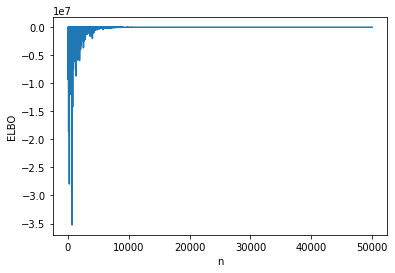

In [ ]:
advi_elbo = pd.DataFrame(
    {'ELBO': -approx.hist,
     'n': np.arange(approx.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

In [ ]:
trace_VI = approx.sample(draws=5000)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if __name__ == '__main__':
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a fu

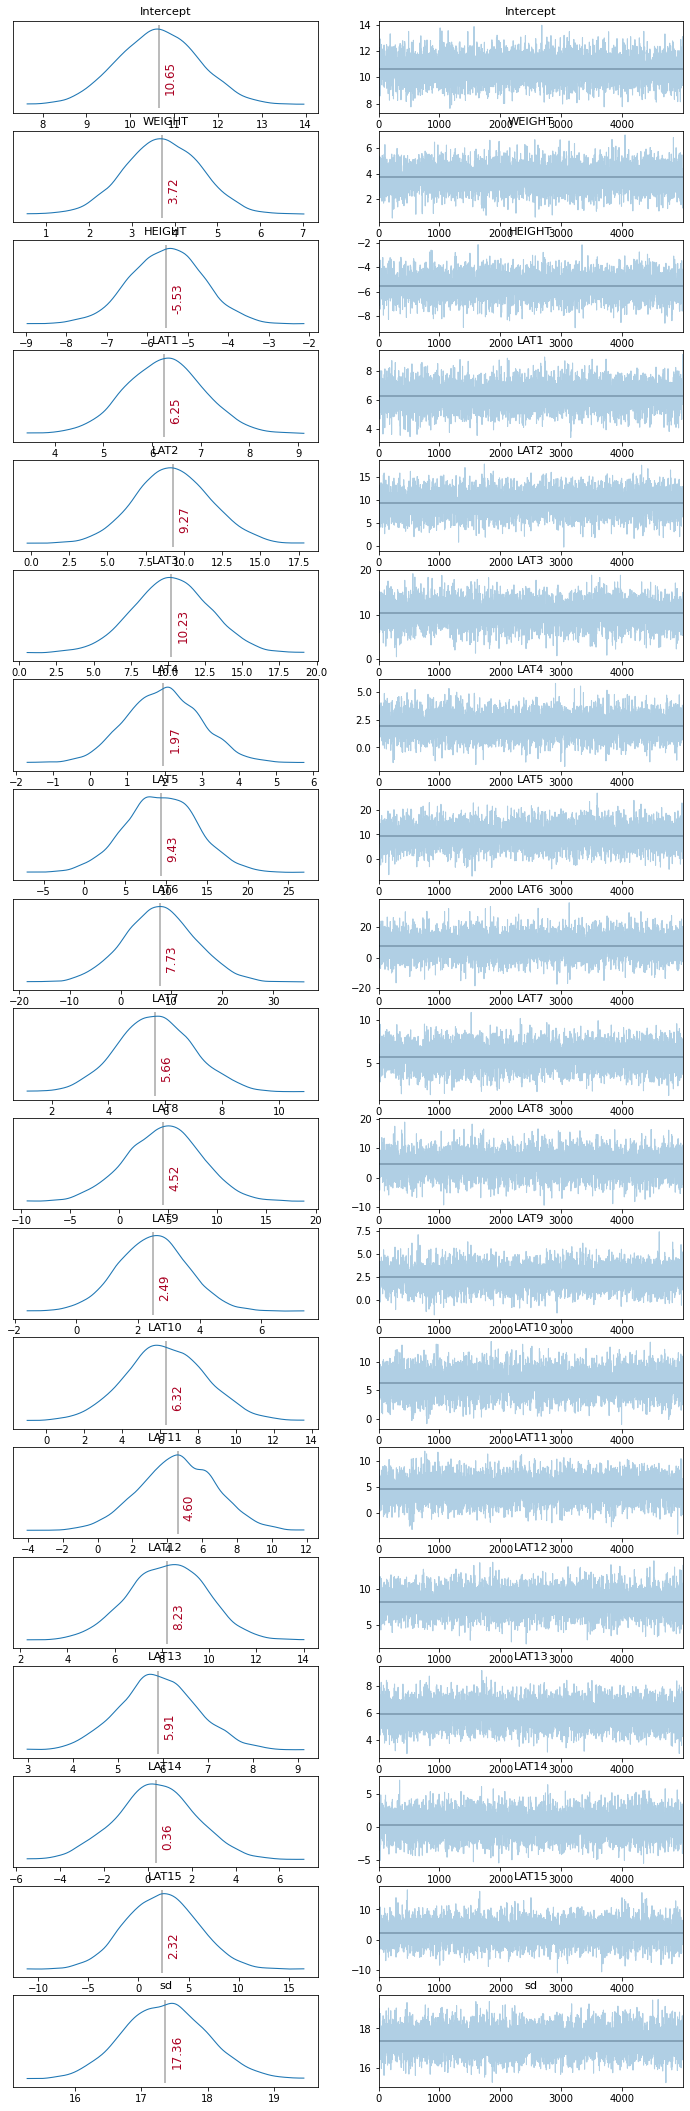

In [ ]:
plot_traces(trace_VI)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


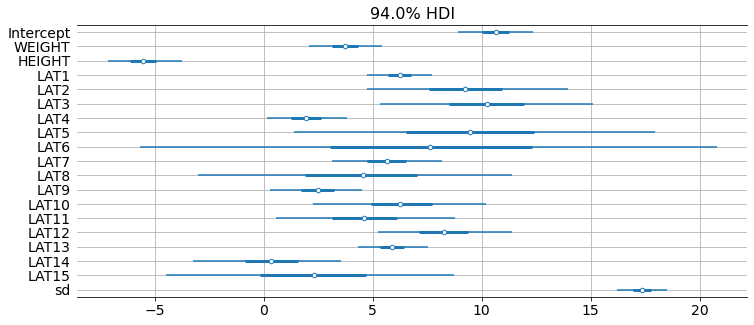

In [ ]:
pm.plots.forestplot(trace_VI, figsize=(12, 5))
# The creates a matplotlib plot, so we can modify with standard matplotlib commands
plt.grid()  # add a grid to the plot

In [ ]:
summary = pm.summary(trace_VI).round(2)
summary

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.65,0.92,8.94,12.35,0.01,0.01,4823.0,4909.0,NaN
WEIGHT,3.72,0.89,2.10,5.41,0.01,0.01,4747.0,4940.0,NaN
HEIGHT,-5.53,0.90,-7.14,-3.76,0.01,0.01,4714.0,4874.0,NaN
LAT1,6.25,0.80,4.73,7.74,0.01,0.01,5382.0,5017.0,NaN
LAT2,9.27,2.44,4.76,13.95,0.04,0.02,4874.0,4848.0,NaN
LAT3,10.23,2.60,5.36,15.11,0.04,0.03,4425.0,4400.0,NaN
LAT4,1.96,1.00,0.14,3.82,0.01,0.01,4943.0,4828.0,NaN
LAT5,9.43,4.40,1.40,17.98,0.07,0.05,4184.0,4166.0,NaN
LAT6,7.73,7.07,-5.68,20.78,0.10,0.07,4645.0,4637.0,NaN
LAT7,5.66,1.33,3.14,8.16,0.02,0.01,5046.0,4940.0,NaN


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08ab0839d0>,
      dtype=object)

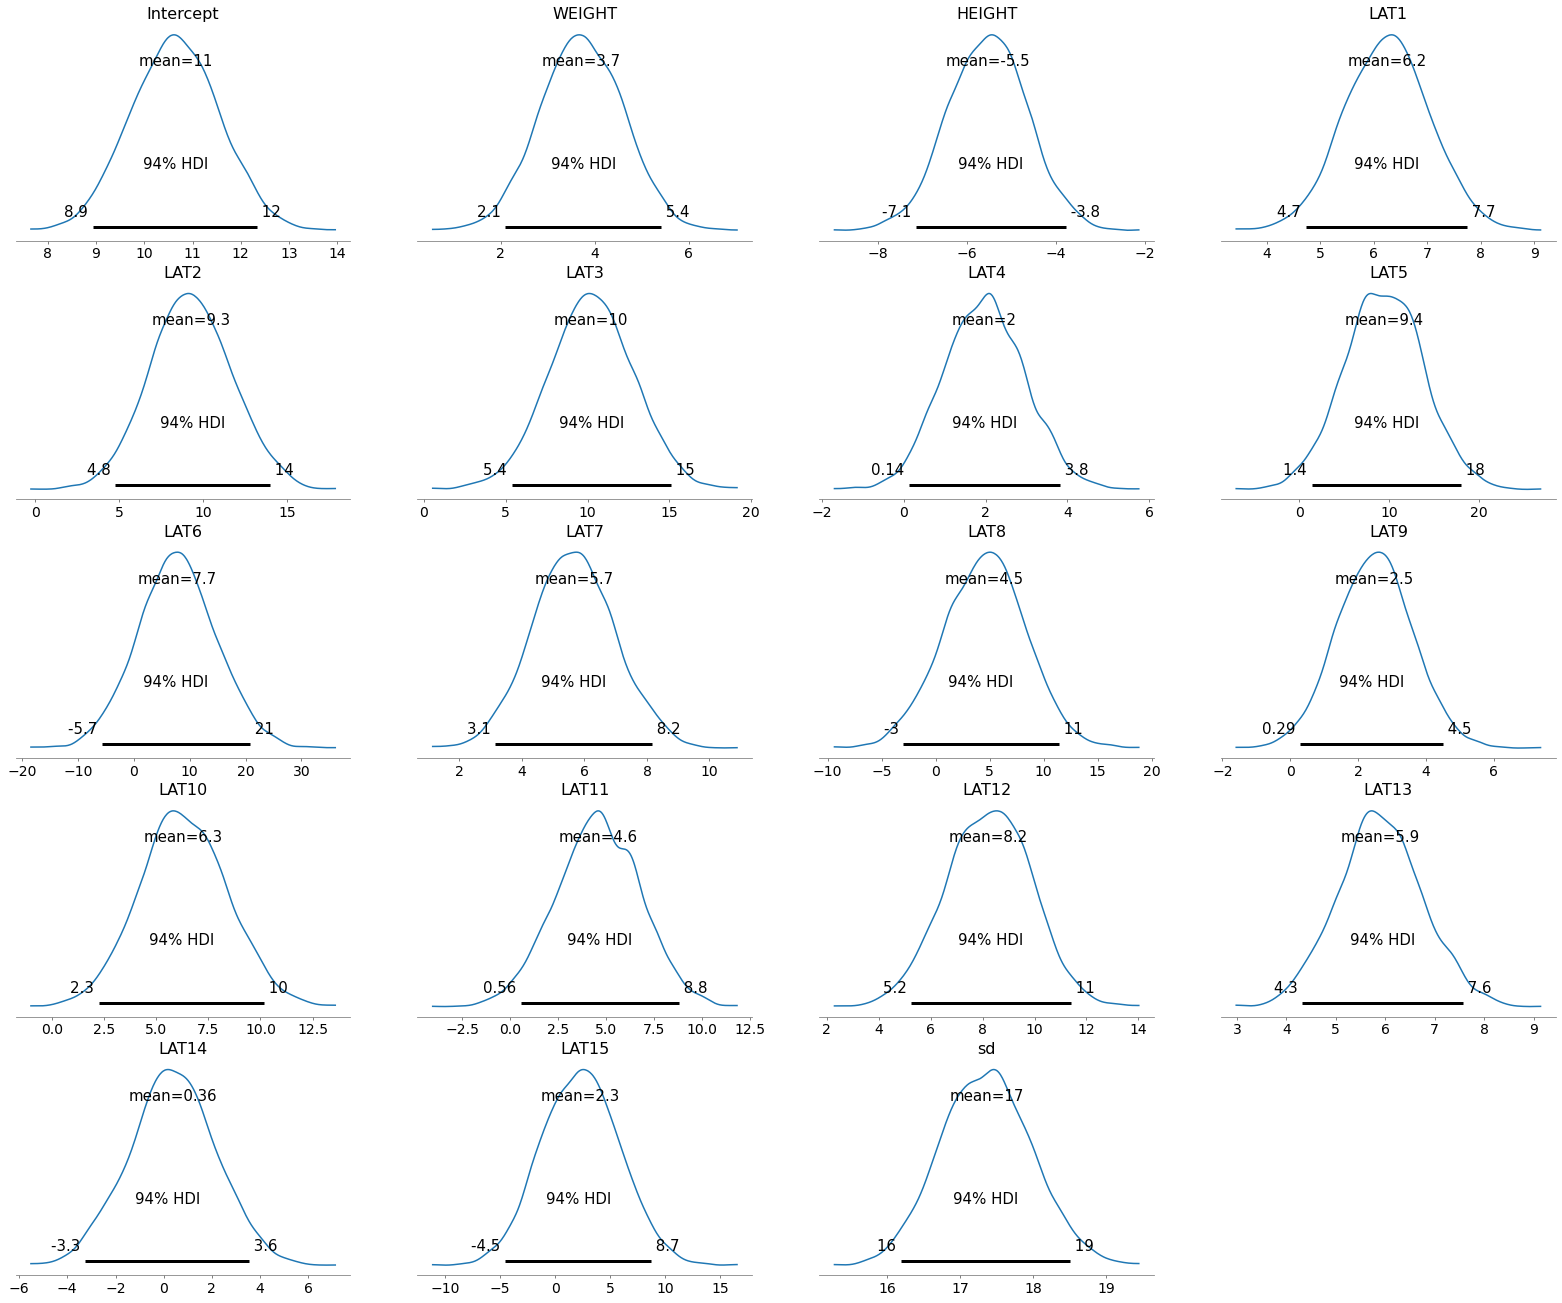

In [ ]:
pm.plots.plot_posterior(trace_VI)

# Prediction / Validation with the model trained by latent vector and demographic (weight and height)

In [ ]:
# Take the comlumns we will use
print("==================================================================")
df_val_data = df_val_data_entire[['IXI_ID', 'AGE', 'WEIGHT', 'HEIGHT','LAT1', 'LAT2', 'LAT3', 'LAT4', 'LAT5',
           'LAT6', 'LAT7', 'LAT8', 'LAT9', 'LAT10',
           'LAT11', 'LAT12', 'LAT13', 'LAT14', 'LAT15']]
print(df_val_data)

    IXI_ID        AGE  WEIGHT  HEIGHT  ...     LAT12     LAT13     LAT14     LAT15
2     30.0  31.460643    65.0   180.0  ...  0.514011  1.311280  0.067248  0.107469
3    254.0  25.582478    64.0   164.0  ...  0.442605  1.352628  0.393570  0.003649
4    544.0  58.042437    60.0   170.0  ...  1.245456  1.357436  0.403240  0.017097
5     85.0  31.849418    59.0   166.0  ...  0.555401  1.839041  0.301579  0.008698
6    521.0  70.836413    73.0   163.0  ...  0.210772  1.586152  0.124127  0.030662
7    518.0  75.827515    63.0   163.0  ...  0.434642  1.963578  0.022493  0.048807
8    315.0  25.451061    70.0   173.0  ...  0.056308  2.002512  1.070540  0.335683
9     25.0  29.779603    60.0   165.0  ...  0.416114  1.257622  0.080621  0.007710
10   262.0  20.928131    47.0   156.0  ...  1.191785  0.953114  0.600195  0.170907
11   200.0  49.919233    83.0   165.0  ...  0.825329  0.985412  0.444992  0.077953
12    69.0  26.272416    51.0   161.0  ...  0.555679  1.145259  0.023540  0.263464
13  

In [ ]:
# Remove the wrong cases 
df_val_data = df_val_data.loc[ (df_val_data['HEIGHT'] < 300) ] # Remove the rows that HEIGHT > 300cm
df_val_data = df_val_data.loc[ (df_val_data['HEIGHT'] > 130) ] # Remove the rows that HEIGHT < 130cm
df_val_data = df_val_data.loc[ (df_val_data['WEIGHT'] < 200) ] # Remove the rows that WEIGHT > 200kg

In [ ]:
g = sns.pairplot(df_val_data)

In [ ]:
# Standardize the data (mean for each numerical variable of zero, standard deviation of one.)
df_val_data_normalized = df_val_data.copy()

for key in df_val_data.keys()[1:]:
    try:
        print("Standardizing "+key+".")
        df_val_data_normalized[key] = df_val_data_normalized[key] - np.mean(df_val_data_normalized[key])
        df_val_data_normalized[key] = df_val_data_normalized[key] / np.std(df_val_data_normalized[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
print("==================================================================")
print(df_val_data_normalized)
print("==================================================================")
print(df_val_data_normalized.describe())

Standardizing AGE.
Standardizing WEIGHT.
Standardizing HEIGHT.
Standardizing LAT1.
Standardizing LAT2.
Standardizing LAT3.
Standardizing LAT4.
Standardizing LAT5.
Standardizing LAT6.
Standardizing LAT7.
Standardizing LAT8.
Standardizing LAT9.
Standardizing LAT10.
Standardizing LAT11.
Standardizing LAT12.
Standardizing LAT13.
Standardizing LAT14.
Standardizing LAT15.
    IXI_ID       AGE    WEIGHT  ...     LAT13     LAT14     LAT15
2     30.0 -1.076011 -0.556715  ... -0.150673 -0.796273 -0.174385
3    254.0 -1.412603 -0.623622  ... -0.002628  0.425322 -0.843817
4    544.0  0.446100 -0.891249  ...  0.014588  0.461522 -0.757104
5     85.0 -1.053750 -0.958156  ...  1.738954  0.080949 -0.811261
6    521.0  1.178701 -0.021461  ...  0.833496 -0.583344 -0.669638
7    518.0  1.464498 -0.690529  ...  2.184855 -0.963816 -0.552636
8    315.0 -1.420129 -0.222181  ...  2.324256  2.959573  1.297126
9     25.0 -1.172270 -0.891249  ... -0.342793 -0.746209 -0.817631
10   262.0 -1.679118 -1.761038  ... -

In [ ]:
with pm.Model() as predictive_model:
    pm.glm.GLM.from_formula(formula = 'AGE ~ WEIGHT + HEIGHT + LAT1 + LAT2 + LAT3 + LAT4 + LAT5 + LAT6 + LAT7 + LAT8 + LAT9 + LAT10 + LAT11 + LAT12 + LAT13 + LAT14 + LAT15', 
                            # data = df_val_data_normalized,
                            data = df_data_normalized, 
                            family = pm.glm.families.Normal()) # Normal() for linear regression

    #trace = pm.sample(5000) 
    # approx = pm.fit(50000, method = 'advi')
    posterior = pm.sample_posterior_predictive(trace_VI)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


In [ ]:
age_pred = posterior['y']

In [ ]:
# Denormalize
age_pred = age_pred * np.std(df_data['AGE'])
age_pred = age_pred + np.mean(df_data['AGE'])


In [ ]:
age_pred_mean = age_pred.mean(axis=0)
age_pred_sd = age_pred.std(axis=0)

age_pred_mean = np.expand_dims(age_pred_mean, axis=1)
age_pred_sd = np.expand_dims(age_pred_sd, axis=1)

age_pred_npmat = np.concatenate((age_pred_mean, age_pred_sd), axis=1)

In [ ]:
# Convert the prediction result into the dataframe
columns = ['AGE_PRED_MEAN', 'AGE_PRED_STD']
df_age_pred = pd.DataFrame(data=age_pred_npmat, columns=columns)

In [ ]:
# df_val_data = df_val_data.reset_index(drop=True)
df_data = df_data.reset_index(drop=True)
df_age_pred = df_age_pred.reset_index(drop=True)

In [ ]:
# df_result = pd.concat([df_val_data['AGE'], df_age_pred], axis=1)
df_result = pd.concat([df_data['AGE'], df_age_pred], axis=1)
df_result = df_result.sort_values(by=['AGE'])
df_result

,AGE,AGE_PRED_MEAN,AGE_PRED_STD
364,20.071184,39.651430,17.583840
258,20.167009,49.909749,17.432080
203,20.213552,43.779576,17.856665
34,20.698152,44.140058,17.557272
110,20.908966,42.386202,17.572764
...,...,...,...
179,78.584531,36.259001,17.542668
83,80.169747,50.823410,17.945460
217,80.802190,41.176234,17.653981
451,82.187543,37.608934,17.372576


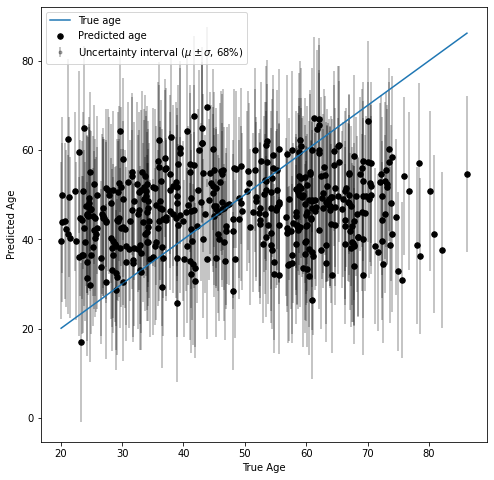

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df_result['AGE'], df_result['AGE'], label='True age')
plt.scatter(df_result['AGE'], df_result['AGE_PRED_MEAN'], c='k', s=30, label='Predicted age')
plt.errorbar(df_result['AGE'], df_result['AGE_PRED_MEAN'], df_result['AGE_PRED_STD'], fmt='.k', alpha=0.3, label='Uncertainty interval ($\mu\pm\sigma$, 68%)')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.legend(loc='upper left')

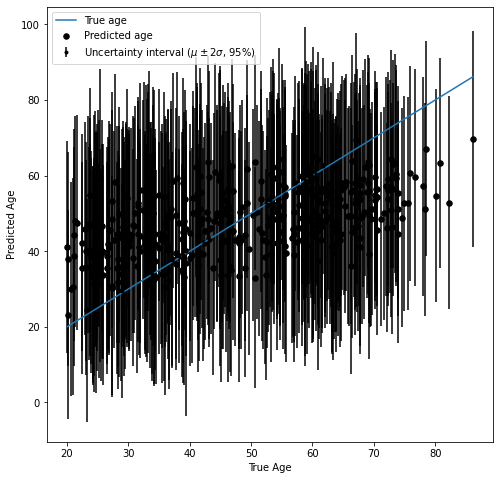

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df_result['AGE'], df_result['AGE'], label='True age')
plt.scatter(df_result['AGE'], df_result['AGE_PRED_MEAN'], c='k', s=30, label='Predicted age')
plt.errorbar(df_result['AGE'], df_result['AGE_PRED_MEAN'], 2*df_result['AGE_PRED_STD'], fmt='.k', label='Uncertainty interval ($\mu\pm2\sigma$, 95%)')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.legend(loc='upper left')

# Validatin with training dataset

In [ ]:
with pm.Model() as predictive_model:
    pm.glm.GLM.from_formula(formula = 'AGE ~ WEIGHT + HEIGHT + LAT1 + LAT2 + LAT3 + LAT4 + LAT5 + LAT6 + LAT7 + LAT8 + LAT9 + LAT10 + LAT11 + LAT12 + LAT13 + LAT14 + LAT15', 
                            data = df_data_normalized, 
                            family = pm.glm.families.Normal()) # Normal() for linear regression

    #trace = pm.sample(5000) 
    # approx = pm.fit(50000, method = 'advi')
    posterior = pm.sample_posterior_predictive(trace_VI)